## Creating condition for failure classification

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

df = pd.read_csv('Datasets/dataset_comp.csv', sep = ';')
df

,Timestamp,corrente_cp11,corrente_cp12,corrente_cp13,corrente_cp31,vazaro_ar,pressao_ar
0,2021-12-01 00:00:00,96.900002,92.599998,97.000000,97.400002,21204.308594,516.897827
1,2021-12-01 00:01:00,96.900002,92.500000,97.000000,97.400002,21073.390625,516.804749
2,2021-12-01 00:02:00,96.900002,92.300003,96.900002,97.800003,21070.710938,517.828857
3,2021-12-01 00:03:00,96.800003,92.500000,97.000000,97.400002,21106.867188,518.573669
4,2021-12-01 00:04:00,97.000000,92.599998,97.199997,97.400002,21230.927734,518.759949
...,...,...,...,...,...,...,...
61357,2022-01-12 23:56:00,99.699997,96.000000,111.000000,98.400002,20611.375000,592.868469
61358,2022-01-12 23:57:00,99.500000,95.599998,110.699997,97.800003,20561.994141,594.916626
61359,2022-01-12 23:58:00,99.599998,95.699997,110.900002,98.700005,20605.894531,594.637390
61360,2022-01-12 23:59:00,99.400002,95.599998,110.699997,98.099998,20581.210938,595.568359


In [3]:
df.describe()

,corrente_cp11,corrente_cp12,corrente_cp13,corrente_cp31,vazaro_ar,pressao_ar
count,61362.000000,61362.000000,61362.000000,61362.000000,61362.000000,61362.000000
mean,96.309420,91.236344,90.404480,96.356543,21095.299721,513.580014
std,2.212627,8.045329,33.209106,1.924950,1137.053218,31.025603
min,89.300003,-37.500000,-37.500000,90.599998,14367.592773,338.236633
25%,94.599998,90.300003,94.500000,94.800003,21038.521484,504.329224
50%,95.800003,91.500000,96.500000,96.099998,21354.267578,516.432373
75%,98.300003,93.099998,100.800003,97.800003,21598.835938,526.859680
max,102.699997,97.300003,114.400002,105.900002,23066.876953,637.836365


In [4]:
# Set of operations for air flow and pressure
# A compressor must not operate with current greater than 100 A when the pressure and flow valves are less than average

set_vazao = df['vazaro_ar'].mean()
set_pressao = df['pressao_ar'].mean()
set_corrente = 100

In [5]:
# Classify function

def classifica(x):
    if (x['corrente_cp11']) > set_corrente and (x['vazaro_ar']) < set_vazao:
        return "1"
    elif (x['corrente_cp11']) > set_corrente and (x['pressao_ar']) < set_pressao:
        return "1"
    else:
        return "0"
    
df['falha'] = df.apply(classifica, axis = 1)

In [6]:
df['falha'].value_counts()

0    60183
1     1179
Name: falha, dtype: int64

### EDA

<AxesSubplot:xlabel='corrente_cp11', ylabel='Count'>

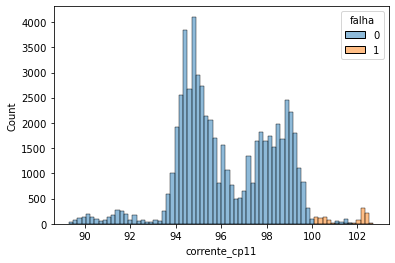

In [7]:
sns.histplot(df, x = 'corrente_cp11', hue = 'falha')

<AxesSubplot:xlabel='falha', ylabel='corrente_cp11'>

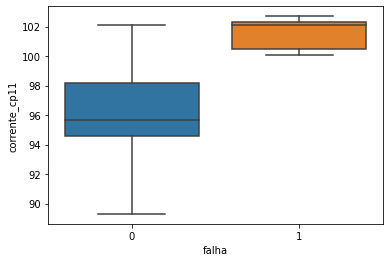

In [8]:
sns.boxplot(x = 'falha', y = 'corrente_cp11', data = df)

In [9]:
# To create data for training and testing, we need to disregard the effect of time, for this it is necessary to delete the column "Timestamp"

df = df.drop(['Timestamp'], axis = 1)

In [12]:
df.to_csv('Datasets/dataset_comp2.csv', sep = ';', index = False)
df.head()

,corrente_cp11,corrente_cp12,corrente_cp13,corrente_cp31,vazaro_ar,pressao_ar,falha
0,96.900002,92.599998,97.000000,97.400002,21204.308594,516.897827,0
1,96.900002,92.500000,97.000000,97.400002,21073.390625,516.804749,0
2,96.900002,92.300003,96.900002,97.800003,21070.710938,517.828857,0
3,96.800003,92.500000,97.000000,97.400002,21106.867188,518.573669,0
4,97.000000,92.599998,97.199997,97.400002,21230.927734,518.759949,0


##### The dataset is already handled and with the fault definitions listed, ready to be trained by the machine learning model